<a href="https://colab.research.google.com/github/LatiefDataVisionary/scikit-learn-with-indonesia-belajar/blob/main/SKLearn_05_Simple_Linear_Regression_dengan_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SKLearn 05: Simple Linear Regression dengan Scikit-Learn | Belajar Machine Learning Dasar**


### **Sample Dataset**

In [1]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
         'harga': [7,9,13,17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


### **Visualisasi Data**

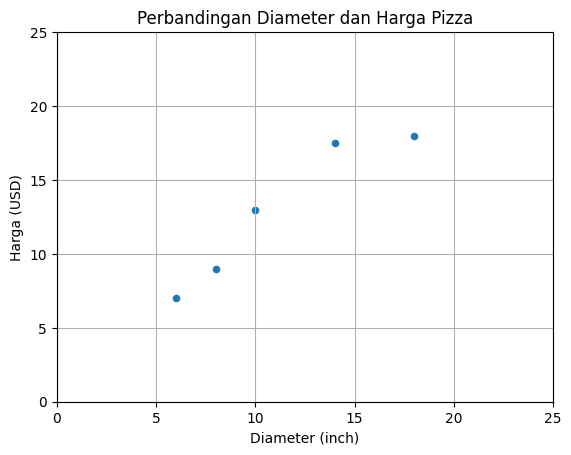

In [2]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (USD)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

### **Simple Linear Regression**

**Penyesuaian Dataset**

In [3]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [4]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [5]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

**Training Simple Linear Regression Model**

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

### **Visualisasi Simple Linear Regression Model**

In [7]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

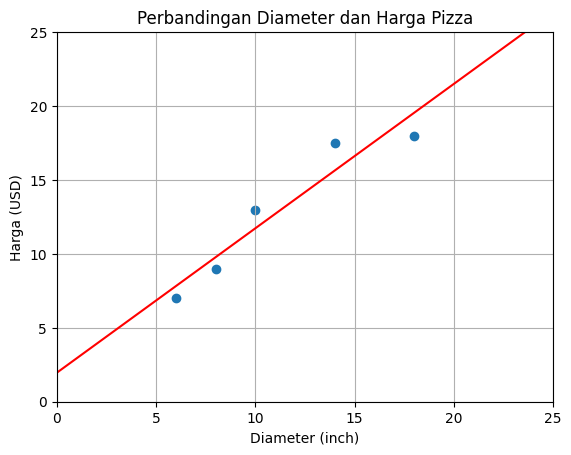

In [8]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (USD)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [9]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


### **Mencari Nilai Slope**

In [10]:
print(f'X: \n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X: 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


**Variance**

In [11]:
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


**Covariance**

In [12]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [14]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


**Slope**

In [15]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 0.976293103448276


### **Mencari nilai Intercept**

In [16]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'Intercept: {intercept}')

Intercept: 1.9655172413793096


### **Prediksi Harga Pizza**

In [17]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [18]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [19]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
  print(f'Diameter: {dmtr} prediksi harga: {hrg}')

Diameter: [12] prediksi harga: 13.681034482758621
Diameter: [20] prediksi harga: 21.491379310344826
Diameter: [23] prediksi harga: 24.42025862068965


### **Evaluasi Simple Linear Regression Model**

**Training & Testing Dataset**

In [20]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

**Training Simple Linear Regression Model**

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared (R^2)**

In [22]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


### **Mencari nilai R-squared (R^2)**

**SSres**

In [ ]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0]) **2
              for x_i, y_i in zip(X_test, y_test)])
print(f'ss_res: {ss_res}')

**SStot**

In [ ]:
mean_y = p.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

**R^2**

In [ ]:
r_squared = 1 - (ss_res / ss_tot)
print(f'R-squared: {r_squared}')